In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train['Married'][df_train['Married'].isnull()] = 'No'
df_train['Gender'][df_train['Gender'].isnull()] = df_train['Self_Employed'][df_train['Gender'].isnull()]
df_train['Gender'][df_train['Gender']=='Yes'] = 'Male'
df_train['Gender'][df_train['Gender']=='No'] = 'Female'
df_train['Dependents'][df_train['Dependents'].isnull()] = '0'
df_train['Self_Employed'][(df_train['Self_Employed'].isnull()) & (df_train['Education']=='Not Graduate')] = 'Yes'
df_train['Self_Employed'][(df_train['Self_Employed'].isnull()) & (df_train['Gender']=='Female')] = 'No'
df_train['Self_Employed'][(df_train['Self_Employed'].isnull()) & (df_train['ApplicantIncome']>5000)] = 'Yes'
df_train['Self_Employed'][(df_train['Self_Employed'].isnull()) & (df_train['ApplicantIncome']<=5000)] = 'No'
df_train['LoanAmount'][df_train['LoanAmount'].isnull()] = df_train['LoanAmount'].median()
df_train['Loan_Amount_Term'][df_train['Loan_Amount_Term'].isnull()] = df_train['Loan_Amount_Term'].median()
df_train['Credit_History'][df_train['Credit_History'].isnull()] = 1.0

In [4]:
df_test = pd.read_csv("test.csv")
df_test1 = pd.read_csv("test.csv")

In [5]:
df_test['Married'][df_test['Married'].isnull()] = 'No'
df_test['Gender'][df_test['Gender'].isnull()] = df_test['Self_Employed'][df_test['Gender'].isnull()]
df_test['Gender'][df_test['Gender']=='Yes'] = 'Male'
df_test['Gender'][df_test['Gender']=='No'] = 'Female'
df_test['Dependents'][df_test['Dependents'].isnull()] = '0'
df_test['Self_Employed'][(df_test['Self_Employed'].isnull()) & (df_test['Education']=='Not Graduate')] = 'Yes'
df_test['Self_Employed'][(df_test['Self_Employed'].isnull()) & (df_test['Gender']=='Female')] = 'No'
df_test['Self_Employed'][(df_test['Self_Employed'].isnull()) & (df_test['ApplicantIncome']>5000)] = 'Yes'
df_test['Self_Employed'][(df_test['Self_Employed'].isnull()) & (df_test['ApplicantIncome']<=5000)] = 'No'
df_test['LoanAmount'][df_test['LoanAmount'].isnull()] = df_test['LoanAmount'].median()
df_test['Loan_Amount_Term'][df_test['Loan_Amount_Term'].isnull()] = df_test['Loan_Amount_Term'].median()
df_test['Credit_History'][df_test['Credit_History'].isnull()] = 1.0

In [6]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


{'boxes': [<matplotlib.lines.Line2D at 0xb5ead30>],
 'caps': [<matplotlib.lines.Line2D at 0xb5f9780>,
 'fliers': [<matplotlib.lines.Line2D at 0xb607438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb5f9fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb5eae80>,
  <matplotlib.lines.Line2D at 0xb5f9358>]}

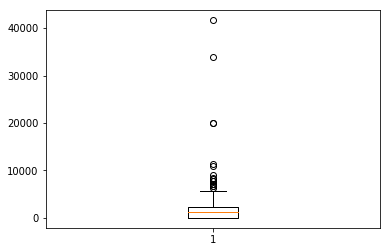

In [7]:
plt.boxplot(df_train['CoapplicantIncome'])

In [8]:
df_train = df_train[df_train['CoapplicantIncome']<6000]

In [9]:
df_train_y = df_train['Loan_Status']
#del df_train['Loan_Status']
del df_train['Loan_ID']
df_train_x = df_train
del df_test['Loan_ID']

In [10]:
df_test.shape

(367, 11)

In [11]:
df_train.shape

(596, 12)

In [12]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train_y=label_encoder.fit_transform(df_train_y)

In [14]:
pd.set_option('display.expand_frame_repr', False)

In [15]:
df_train.corr(method="pearson")['Loan_Status_Y']

ApplicantIncome           -0.009879
CoapplicantIncome          0.040034
LoanAmount                -0.024113
Loan_Amount_Term          -0.029777
Credit_History             0.552458
Gender_Female             -0.038721
Gender_Male                0.038721
Married_No                -0.090067
Married_Yes                0.090067
Dependents_0              -0.017201
Dependents_1              -0.033533
Dependents_2               0.058506
Dependents_3+             -0.002419
Education_Graduate         0.095428
Education_Not Graduate    -0.095428
Self_Employed_No          -0.004048
Self_Employed_Yes          0.004048
Property_Area_Rural       -0.119410
Property_Area_Semiurban    0.148006
Property_Area_Urban       -0.037147
Loan_Status_N             -1.000000
Loan_Status_Y              1.000000
Name: Loan_Status_Y, dtype: float64

In [16]:
df_train.shape

(596, 22)

In [17]:
del df_train['ApplicantIncome']
del df_train['Gender_Female']
del df_train['Married_No']
del df_train['Loan_Status_N']
del df_train['Self_Employed_Yes']
del df_train['Self_Employed_No']
del df_train['Dependents_0']

In [18]:
del df_train['Loan_Status_Y']
del df_test['ApplicantIncome']
del df_test['Gender_Female']
del df_test['Married_No']
del df_test['Self_Employed_Yes']
del df_test['Self_Employed_No']
del df_test['Dependents_0']

In [19]:
df_train.corr(method="pearson")

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
CoapplicantIncome,1.000000,0.114825,-0.006265,0.003731,0.207247,0.246282,-0.023048,0.006913,-0.081712,0.020689,-0.020689,0.099216,-0.023482,-0.072023
LoanAmount,0.114825,1.000000,0.049514,0.004119,0.069588,0.132257,0.065616,0.000100,0.127248,0.165663,-0.165663,0.045365,-0.003161,-0.040765
Loan_Amount_Term,-0.006265,0.049514,1.000000,0.002740,-0.085272,-0.105004,-0.086469,-0.015692,-0.071376,0.070362,-0.070362,0.032435,0.066833,-0.100597
Credit_History,0.003731,0.004119,0.002740,1.000000,0.021845,0.005529,0.016489,-0.000043,-0.053936,0.078084,-0.078084,-0.028815,0.045376,-0.018954
Gender_Male,0.207247,0.069588,-0.085272,0.021845,1.000000,0.341166,0.008647,0.117883,0.086127,-0.056003,0.056003,0.073189,-0.111387,0.044144
Married_Yes,0.246282,0.132257,-0.105004,0.005529,0.341166,1.000000,0.113584,0.250360,0.141740,-0.017575,0.017575,-0.008053,0.000073,0.007741
Dependents_1,-0.023048,0.065616,-0.086469,0.016489,0.008647,0.113584,1.000000,-0.196777,-0.132090,0.022654,-0.022654,-0.079873,0.004272,0.073113
Dependents_2,0.006913,0.000100,-0.015692,-0.000043,0.117883,0.250360,-0.196777,1.000000,-0.130487,-0.025698,0.025698,-0.014786,0.002043,0.012240
Dependents_3+,-0.081712,0.127248,-0.071376,-0.053936,0.086127,0.141740,-0.132090,-0.130487,1.000000,-0.063509,0.063509,0.052883,-0.002559,-0.048685
Education_Graduate,0.020689,0.165663,0.070362,0.078084,-0.056003,-0.017575,0.022654,-0.025698,-0.063509,1.000000,-1.000000,-0.079176,0.045124,0.030191


In [20]:
df_train.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(df_train,df_train_y,test_size=0.25,random_state=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 6,n_estimators=300)

In [23]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rfc.score(X_test,Y_test)

0.8187919463087249

In [25]:
cross_val_score(rfc,df_train,df_train_y,cv=10).mean()

0.8105445957210335

In [26]:
rfc_y_pred = rfc.predict(df_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=20,max_depth =3)
rfc_model.fit(X_train,Y_train)
rfc_predict = rfc_model.predict(X_test)
print (accuracy_score(Y_test,rfc_predict))
print (confusion_matrix(Y_test,rfc_predict))
print (classification_report(Y_test,rfc_predict))

0.8389261744966443
[[ 20  23]
 [  1 105]]
             precision    recall  f1-score   support

          0       0.95      0.47      0.62        43
          1       0.82      0.99      0.90       106

avg / total       0.86      0.84      0.82       149



In [28]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train,Y_train)
logreg_predict = logreg_model.predict(X_test)
print (accuracy_score(Y_test,logreg_predict))
print (confusion_matrix(Y_test,logreg_predict))
print (classification_report(Y_test,logreg_predict))

0.8322147651006712
[[ 20  23]
 [  2 104]]
             precision    recall  f1-score   support

          0       0.91      0.47      0.62        43
          1       0.82      0.98      0.89       106

avg / total       0.84      0.83      0.81       149



In [29]:
from sklearn.svm import SVC
svc_model = SVC(kernel = "linear", C=2,gamma=1)
svc_model.fit(X_train,Y_train)
svc_predict = svc_model.predict(X_test)
print (accuracy_score(Y_test,svc_predict))
print (confusion_matrix(Y_test,svc_predict))
print (classification_report(Y_test,svc_predict))

0.8389261744966443
[[ 20  23]
 [  1 105]]
             precision    recall  f1-score   support

          0       0.95      0.47      0.62        43
          1       0.82      0.99      0.90       106

avg / total       0.86      0.84      0.82       149



In [43]:
from sklearn.ensemble import BaggingClassifier
bc_model = BaggingClassifier(logreg_model,max_features=0.9,max_samples=0.5,n_estimators=30)
bc_model.fit(X_train,Y_train)
bc_predict = bc_model.predict(X_test)
print (accuracy_score(Y_test,bc_predict))
print (confusion_matrix(Y_test,bc_predict))
print (classification_report(Y_test,bc_predict))

0.8389261744966443
[[ 20  23]
 [  1 105]]
             precision    recall  f1-score   support

          0       0.95      0.47      0.62        43
          1       0.82      0.99      0.90       106

avg / total       0.86      0.84      0.82       149



In [44]:
from sklearn.ensemble import VotingClassifier
vc_model = VotingClassifier(estimators=[('rfr',rfc_model),('bc',bc_model),('svc',svc_model)],voting='hard')
vc_model.fit(X_train,Y_train)
vc_predict = vc_model.predict(X_test)
print (accuracy_score(Y_test,vc_predict))
print (confusion_matrix(Y_test,vc_predict))
print (classification_report(Y_test,vc_predict))

0.8389261744966443
[[ 20  23]
 [  1 105]]
             precision    recall  f1-score   support

          0       0.95      0.47      0.62        43
          1       0.82      0.99      0.90       106

avg / total       0.86      0.84      0.82       149



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
accuracy_score(rfc_predict,logreg_predict)

0.9932885906040269

In [47]:
y_pred = vc_model.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
accuracy_score(y_pred,rfc_y_pred)

0.9809264305177112

In [49]:
final = pd.read_csv("Sample_Submission.csv")
final['Loan_ID'] = df_test1['Loan_ID']
final['Loan_Status'] = y_pred
final['Loan_Status'][final['Loan_Status']==1]='Y'
final['Loan_Status'][final['Loan_Status']==0]='N'

In [51]:
final.to_csv('Submission.csv',index=False)

In [67]:
accuracy_score(svc_predict,bc_predict)

1.0

In [64]:
bc_predict[(svc_predict==1)|(rfc_predict==1)|(bc_predict==1)]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,